<a href="https://colab.research.google.com/github/yelim421/SolarPower/blob/main/G_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Solar_Power

/content/drive/MyDrive/Solar_Power


# data exploration

In [5]:
import pandas as pd

In [23]:
import pandas as pd

# Load the dataset
data = pd.read_csv('temp_backup.csv')
# Convert 'DateTime' column to datetime object
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract year from 'DateTime' column
data['Year'] = data['DateTime'].dt.year

# Split the data based on year
train_data = data[data['Year'] < 2021]
test_data = data[data['Year'].isin([2021, 2022])]

# Save the split data to CSV files
train_data_path = "train_data_nan.csv"
test_data_path = "test_data_nan.csv"
train_data.to_csv(train_data_path, index=False)
test_data.to_csv(test_data_path, index=False)

In [6]:
train = pd.read_csv('train_data_nan.csv', index_col='DateTime')
test = pd.read_csv('test_data_nan.csv', index_col = 'DateTime')
# train = train.drop(columns = ['Year'])
# test = test.drop(columns = ['Year'])

train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)
train.shape, test.shape

((34741, 24), (8934, 24))

In [52]:
train.tail()

,Month,Day,Hour,Temperature(C),Precipitation(mm),Humidity(%),VaporPressure(hPa),DewPointTemperature(C),Sunshine(hr),SolarRadiation(MJ/m2),...,CloudForm,LowCloud(100m),Visibility(10m),GroundState(code),PhenomenonNumber,d2m,t2m,aerosol,power,Year
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-12-31 13:00:00,12,31,13,-2.3,-1.0,72.0,3.7,-6.6,0.1,1.00,...,CuSc,4.0,727.0,-1.0,8.0,269.65628,275.14212,38.0,307200.0,2020
2020-12-31 14:00:00,12,31,14,-0.9,-1.0,71.0,4.1,-5.5,0.3,0.88,...,CuSc,2.0,1999.0,-1.0,8.0,269.80054,274.83124,33.0,182400.0,2020
2020-12-31 15:00:00,12,31,15,-0.1,0.6,87.0,5.3,-2.0,0.2,0.49,...,CuSc,3.0,507.0,-1.0,8.0,269.83353,274.57706,40.0,28800.0,2020
2020-12-31 16:00:00,12,31,16,-0.4,-1.0,89.0,5.3,-1.9,0.2,0.54,...,CuSc,2.0,2000.0,-1.0,8.0,269.27527,274.70325,32.0,211200.0,2020
2020-12-31 17:00:00,12,31,17,0.8,-1.0,75.0,4.9,-3.1,0.1,0.20,...,CuSc,9.0,2000.0,-1.0,8.0,268.56277,274.58500,28.0,28800.0,2020


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34741 entries, 2013-03-19 07:00:00 to 2020-12-31 17:00:00
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      34741 non-null  int64  
 1   Day                        34741 non-null  int64  
 2   Hour                       34741 non-null  int64  
 3   Temperature(C)             34741 non-null  float64
 4   Precipitation(mm)          34741 non-null  float64
 5   Humidity(%)                34741 non-null  float64
 6   VaporPressure(hPa)         34741 non-null  float64
 7   DewPointTemperature(C)     34741 non-null  float64
 8   Sunshine(hr)               34741 non-null  float64
 9   SolarRadiation(MJ/m2)      34741 non-null  float64
 10  Snowfall(cm)               34741 non-null  float64
 11  SnowfallLast3Hours(cm)     34741 non-null  float64
 12  TotalCloudCoverage(1/10)   34741 non-null  float64
 13  MidLowCloudCoverage

<Axes: >

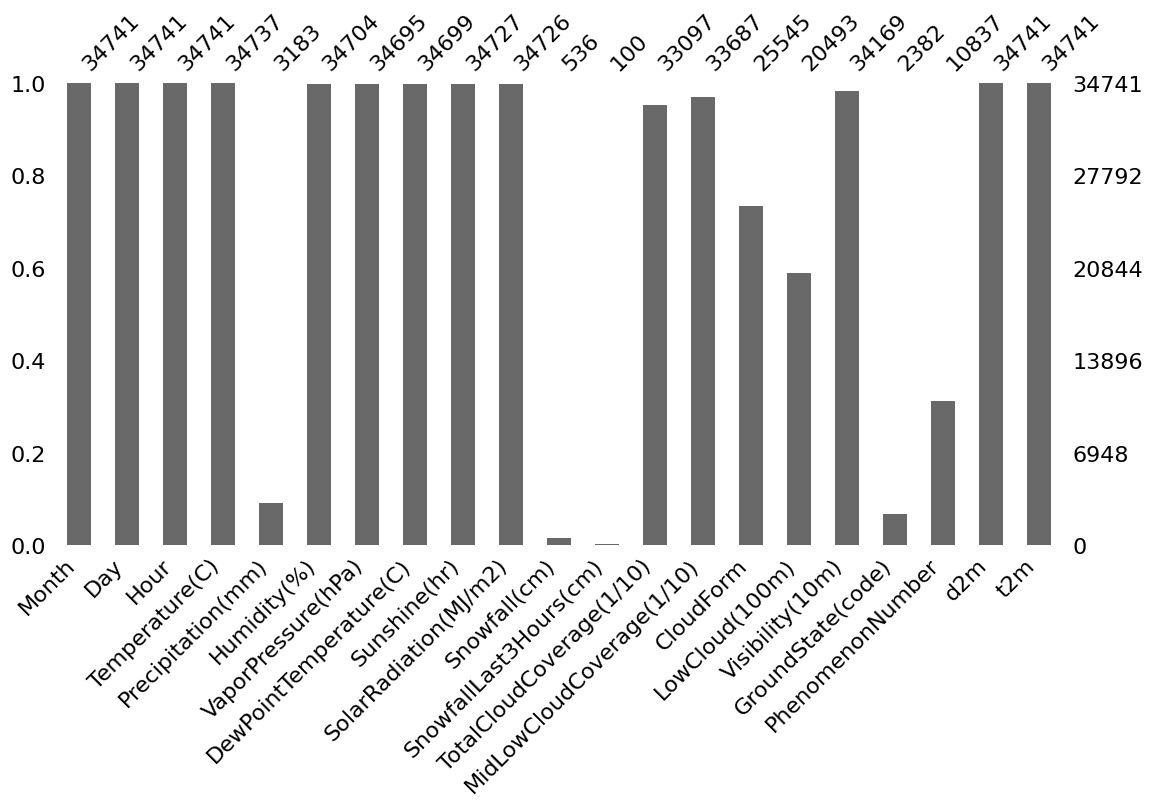

In [34]:
import numpy as np
import missingno as msno

msno.bar(df = train.iloc[:, 0:21], figsize=(13,6))

<Axes: >

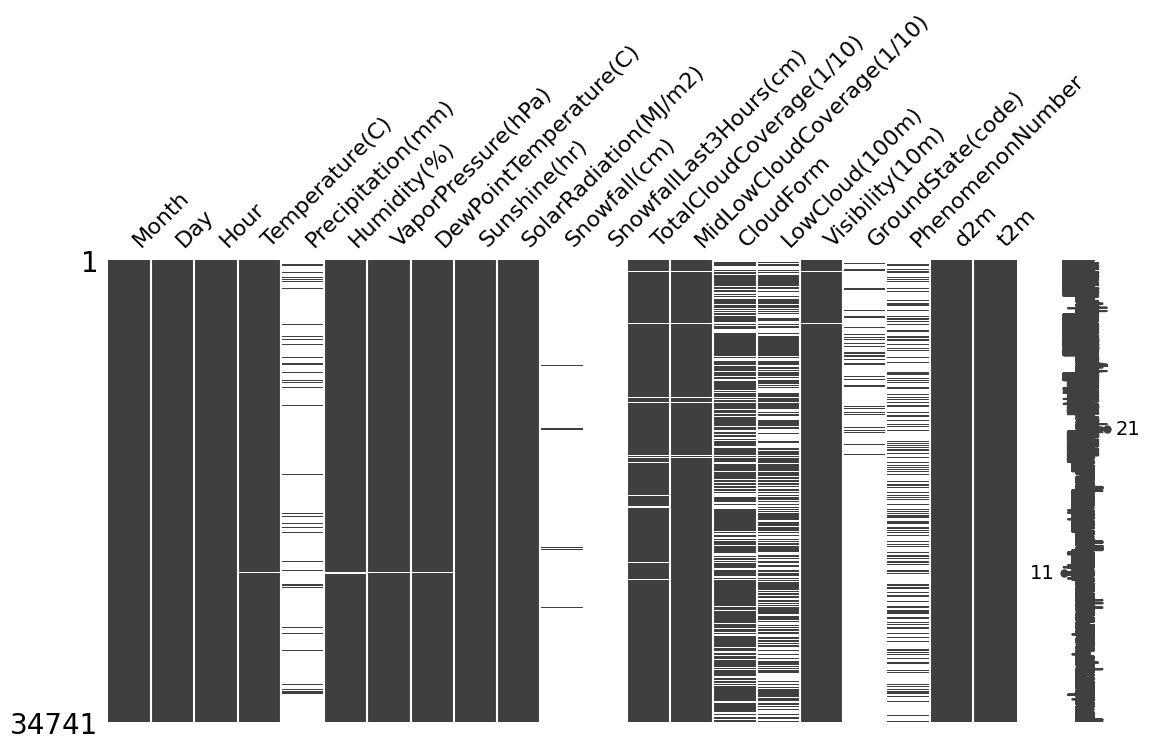

In [35]:
msno.matrix(df=train.iloc[:, 0:21], figsize=(13,6))

Text(0.5, 1.0, 'Target Distribution')

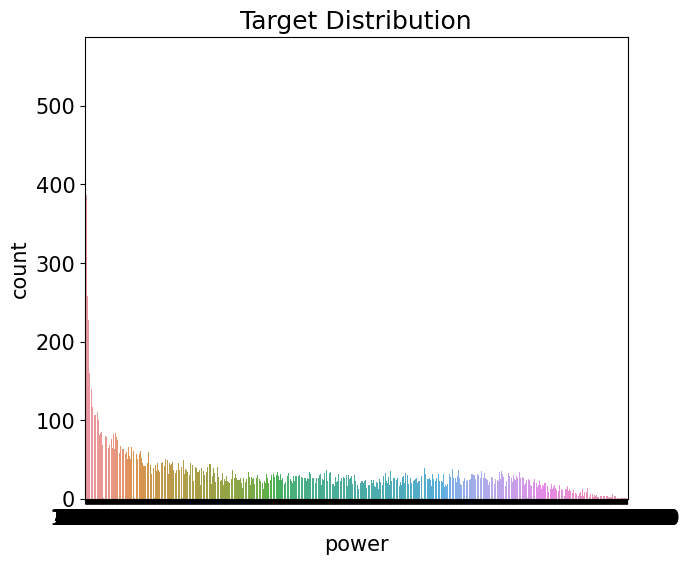

In [41]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def write_percent(ax, total_size):
  for patch in ax.patches :
    height = patch.get_height()
    width = patch.get_width()
    left_coord = patch.get_x()
    percent = height/total_size*100

    ax.text(left_coord + width/2.0,
            height + total_size*0.001,
            '{:1.1f}%'.format(percent),
            ha='center')
mpl.rc('font', size = 15)
plt.figure(figsize = (7,6))

ax = sns.countplot(x='power', data = train)
#write_percent(ax, len(train))
ax.set_title('Target Distribution')

<Axes: >

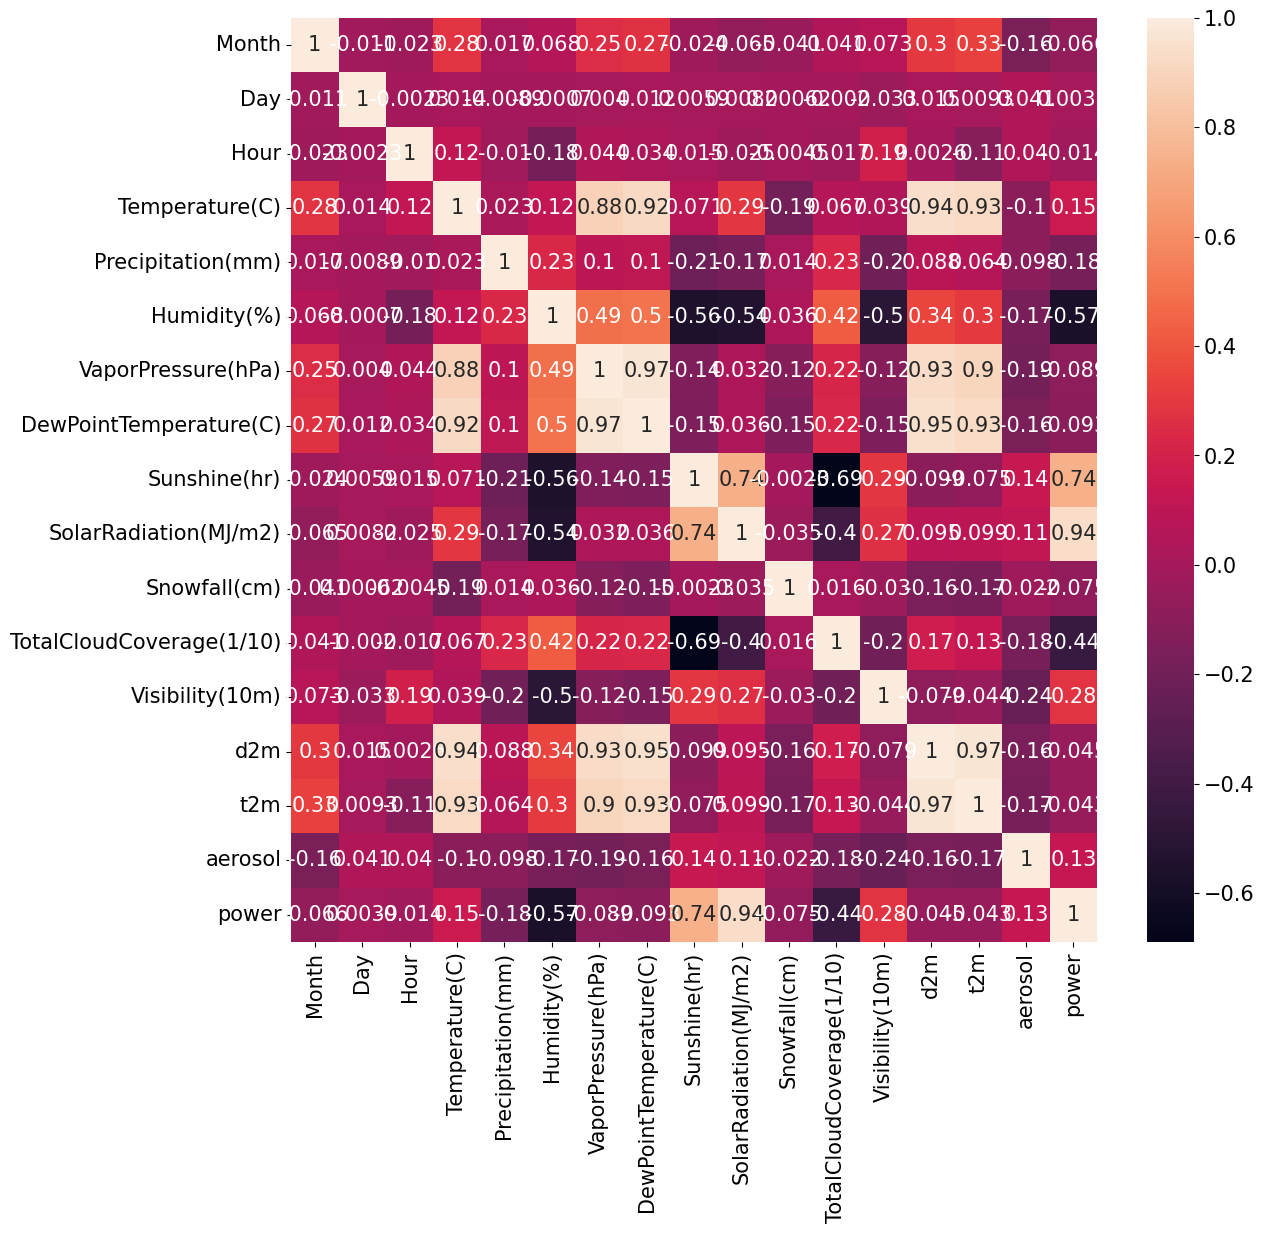

In [48]:
train = train.dropna()
plt.figure(figsize=(13,12))
cont_corr = train.corr()
sns.heatmap(cont_corr, annot=True)

In [7]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('power', axis = 1)

all_features = all_data.columns
all_features

Index(['Month', 'Day', 'Hour', 'Temperature(C)', 'Precipitation(mm)',
       'Humidity(%)', 'VaporPressure(hPa)', 'DewPointTemperature(C)',
       'Sunshine(hr)', 'SolarRadiation(MJ/m2)', 'Snowfall(cm)',
       'SnowfallLast3Hours(cm)', 'TotalCloudCoverage(1/10)',
       'MidLowCloudCoverage(1/10)', 'CloudForm', 'LowCloud(100m)',
       'Visibility(10m)', 'GroundState(code)', 'PhenomenonNumber', 'd2m',
       't2m', 'aerosol', 'Year'],
      dtype='object')

In [8]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['CloudForm', 'GroundState(code)', 'PhenomenonNumber']
all_data[cat_features] = all_data[cat_features].astype(str)
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])
encoded_cat_matrix

<43675x107 sparse matrix of type '<class 'numpy.float64'>'
	with 131025 stored elements in Compressed Sparse Row format>

In [9]:
from scipy import sparse
all_data_numeric = all_data.drop(columns=cat_features)
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_numeric),
                               encoded_cat_matrix],
                              format = 'csr')

In [10]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['power'].values

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluation_metric(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [12]:
def rmse(preds, dtrain):
  labels = dtrain.get_label()
  return 'rmse', evaluation_metric(labels, preds), True

In [13]:
from sklearn.model_selection import TimeSeriesSplit

folds = TimeSeriesSplit(n_splits=5)

In [14]:
param_grid = {
    "learning_rate" : 0.0025,
    "objective" : "regression",
    "force_row_wise" : True,
    'random_state' : 0
}

In [15]:
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

In [17]:
import lightgbm as lgb

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
  print('#'*40, f'fold {idx+1} / fold {folds.n_splits}', '#'*40)

  X_train, y_train = X[train_idx], y[train_idx]
  X_valid, y_valid = X[valid_idx], y[valid_idx]

  dtrain = lgb.Dataset(X_train, y_train)
  dvalid = lgb.Dataset(X_valid, y_valid)

  lgb_model = lgb.train(params = param_grid,
                        train_set = dtrain,
                        num_boost_round = 1000,
                        valid_sets = dvalid,
                        feval = rmse,
                        early_stopping_rounds = 100,
                        verbose_eval = 100)

  oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
  oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

  rmse_score = evaluation_metric(y_valid, oof_val_preds[valid_idx])
  print(f'fold {idx+1} rmse : {rmse_score} \n')

######################################## fold 1 / fold 5 ########################################


TypeError: ignored

In [ ]:
()